In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
from pynance import portfolio_optimizer as po

## Read the data

In [3]:
# Read the csv data using pandas
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Descriptive Analysis on the data

Below are some basic statistics for the given data

In [4]:
# Obtain basic statistics for headline lengths
df['headline_length'] = df['headline'].str.len()
headline_stats = df['headline_length'].describe()

### Count the number of articles per publisher

In [5]:
publisher_counts = df['publisher'].value_counts()

### The dates have different format, so first using clean_date function I have converted the dates to similar format

In [6]:
import re

def clean_date(date_str):
    if isinstance(date_str, str):
        date_str = re.sub(r'([-+]\d{2}:\d{2})$', '', date_str)
        return date_str
    return date_str

df['date'] = pd.to_datetime(clean_date(df['date']),  format='mixed', utc=True)

# Set 'date' as the index
df.set_index('date', inplace=True, drop=False)

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length'],
      dtype='object')


#### Extract trends over time, e.g., number of articles per day

In [8]:
articles_per_day = df.groupby(df['date'].dt.date).size()

#### Extract trends over time, e.g., number of articles per day in descending order

In [9]:
articles_per_day_descending = df.groupby(df['date'].dt.date).size().sort_values(ascending=False)

#### Group by date and aggregate headlines as a list

In [10]:
articles_per_day = df.groupby(df['date'].dt.date).agg({'headline': list, 'stock': 'count'})
articles_per_day.columns = ['Headlines', 'Count']

#### Sort by article count in descending order

In [11]:
articles_per_day = articles_per_day.sort_values(by='Count', ascending=False)
articles_per_day_sorted = articles_per_day.sort_values(by='Count', ascending=False)

### Display what I have been working with

In [12]:
# Display results
print("Headline Length Statistics:")
print(headline_stats)
print("\nNumber of Articles per Publisher:")
print(publisher_counts)
print("\nArticles per Day:")
print(articles_per_day)
print("Articles per Day (Descending Order):")
print(articles_per_day_descending)
print("Articles per Day (Descending Order):")
print(articles_per_day)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

Articles per Day:
                                                    Headlines  Count
date                                                                
2020-03-12  [Stocks That Hit 52-Week Lows On Thursday, Sto...   2739
2020-02-28  [Stocks That Hit 52-Week Lows On Friday, CFRA ...   1620
2020-03-19  [Stocks That Hit 52-Week Lows On Thursday, Air...   1595
2

#### Print the top N days with the highest article counts, e.g N = Number of days

In [13]:
N = 100
top_days = articles_per_day_sorted.head(N)

print("Top", N, "Days with the Highest Article Counts:")
print(top_days)

Top 100 Days with the Highest Article Counts:
                                                    Headlines  Count
date                                                                
2020-03-12  [Stocks That Hit 52-Week Lows On Thursday, Sto...   2739
2020-02-28  [Stocks That Hit 52-Week Lows On Friday, CFRA ...   1620
2020-03-19  [Stocks That Hit 52-Week Lows On Thursday, Air...   1595
2020-02-27  [Stocks That Hit 52-Week Lows On Thursday, Buc...   1567
2020-03-06  [Stocks That Hit 52-Week Lows On Friday, Stock...   1428
...                                                       ...    ...
2020-04-13  [Cooperman Says Will Be 'A While' Before We Se...    906
2018-12-19  [Stocks That Will Be Trading Ex Dividend Thurs...    905
2016-08-03  [Atlas Air Misses Estimates, Talks Partnership...    903
2020-04-22  [Agilent Reports Has Become Top-Level Sponsor ...    902
2020-05-14  [Alcoa CEO, Currently Presenting At BMO Global...    901

[100 rows x 2 columns]


In [14]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.dayofweek

# Map integers to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_names)


# Display results
print(df[['date', 'day_of_week']])

# Count the number of articles for each day of the week
day_counts = df['day_of_week'].value_counts()

# Display results
print("Number of Articles per Day of the Week:")
print(day_counts)

                                               date day_of_week
date                                                           
2020-06-05 14:30:54+00:00 2020-06-05 14:30:54+00:00      Friday
2020-06-03 14:45:20+00:00 2020-06-03 14:45:20+00:00   Wednesday
2020-05-26 08:30:07+00:00 2020-05-26 08:30:07+00:00     Tuesday
2020-05-22 16:45:06+00:00 2020-05-22 16:45:06+00:00      Friday
2020-05-22 15:38:59+00:00 2020-05-22 15:38:59+00:00      Friday
...                                             ...         ...
2011-08-29 00:00:00+00:00 2011-08-29 00:00:00+00:00      Monday
2011-06-22 00:00:00+00:00 2011-06-22 00:00:00+00:00   Wednesday
2011-06-21 00:00:00+00:00 2011-06-21 00:00:00+00:00     Tuesday
2011-06-21 00:00:00+00:00 2011-06-21 00:00:00+00:00     Tuesday
2011-05-12 00:00:00+00:00 2011-05-12 00:00:00+00:00    Thursday

[1407328 rows x 2 columns]
Number of Articles per Day of the Week:
day_of_week
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday  

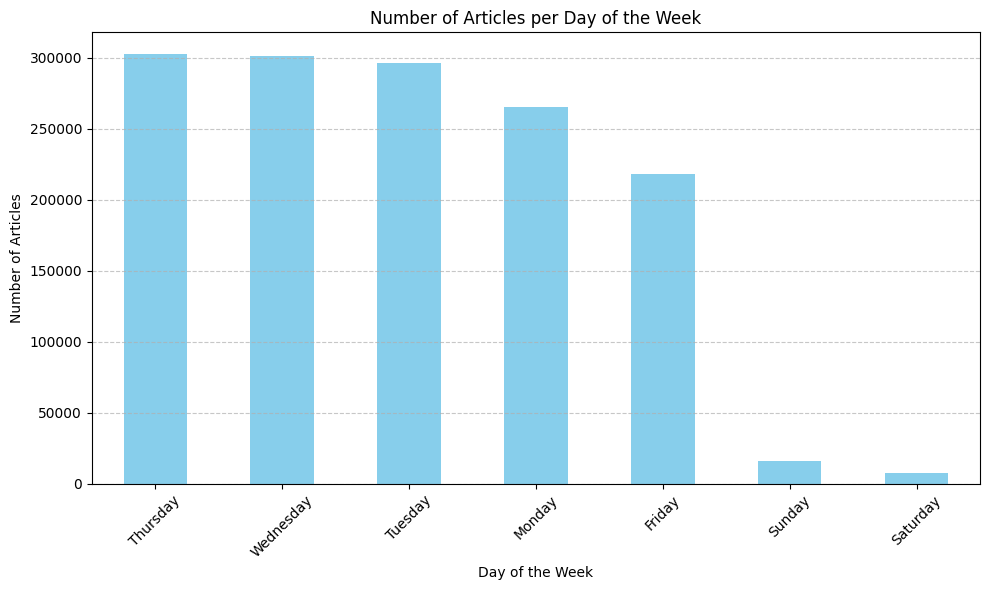

In [15]:
# Count the number of articles for each day of the week
day_counts = df['day_of_week'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Text Analysis(Sentiment Analysis & Topic Modeling)

We can perform sentiment analysis on the headline column using a tool like VADER from NLTK, which is well-suited for analyzing short texts like news headlines.

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each headline
df['sentiment'] = df['headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify the sentiment as positive, neutral, or negative
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

We can use TF-IDF and LDA to extract common topics or keywords from the headline column.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the headlines
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['headline'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Get the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tfidf.get_feature_names_out(), no_top_words)

Topic 0:
pt buy target maintains price raises 00 neutral downgrades lowers
Topic 1:
vs est eps reports sales estimate q4 q2 q1 q3
Topic 2:
earnings scheduled movers biggest yesterday stock 2016 says 2015 futures
Topic 3:
benzinga upgrades downgrades shares trading losers higher companies lower volume
Topic 4:
stocks market week 52 session moving mid day pre watch


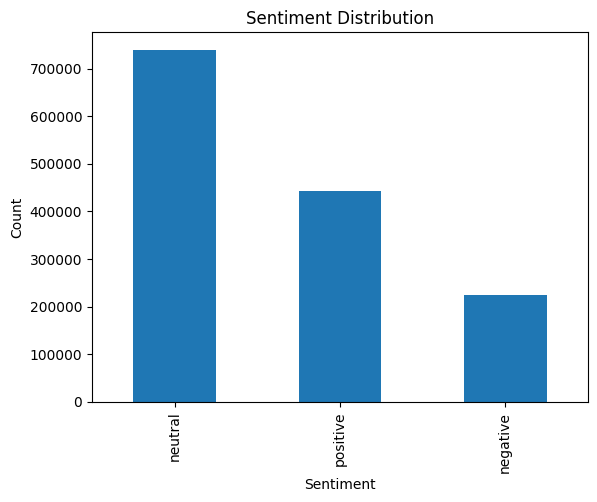

In [19]:
df['sentiment_class'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Time Series Analysis

### Resample the Data by Time Intervals
First, I will aggregate the data by different time intervals (daily, weekly, monthly) to observe trends in publication frequency.

In [20]:
# Resample the publication dates by day
daily_counts = df.resample('D').size()

# Resample by week
weekly_counts = df.resample('W').size()

# Resample by month
monthly_counts = df.resample('ME').size()

### Visualize the Publication Frequency
I can then visualize the results to see how the frequency of article publication changes over time.

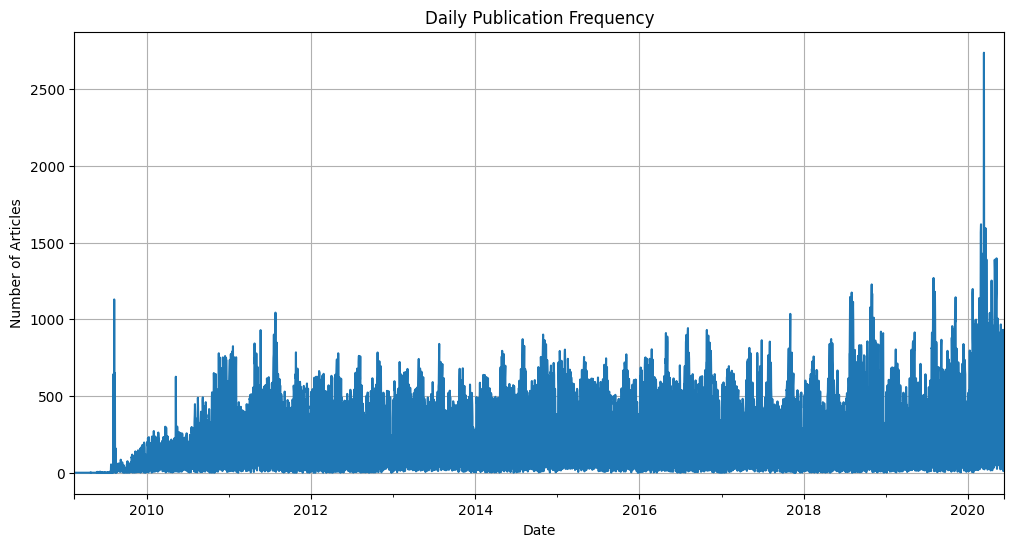

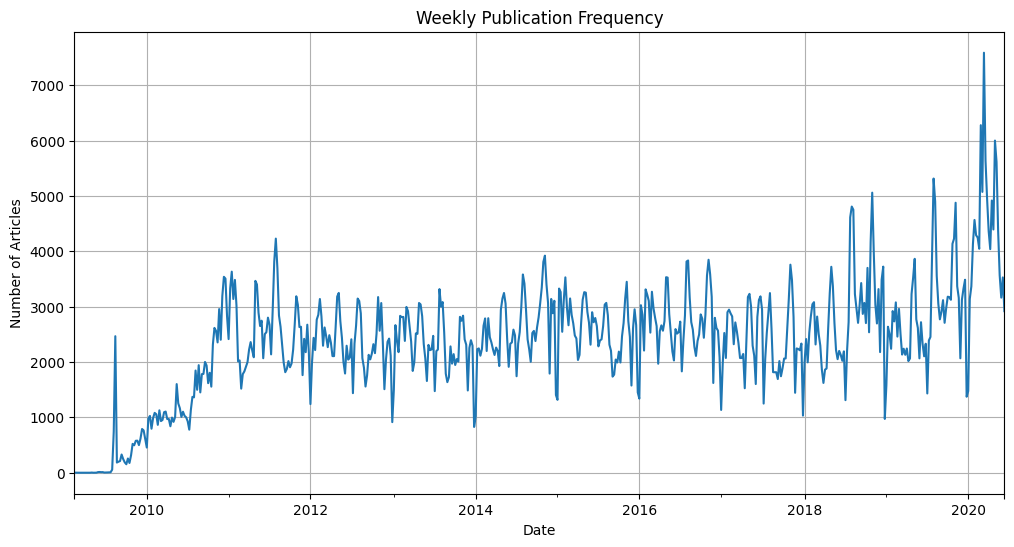

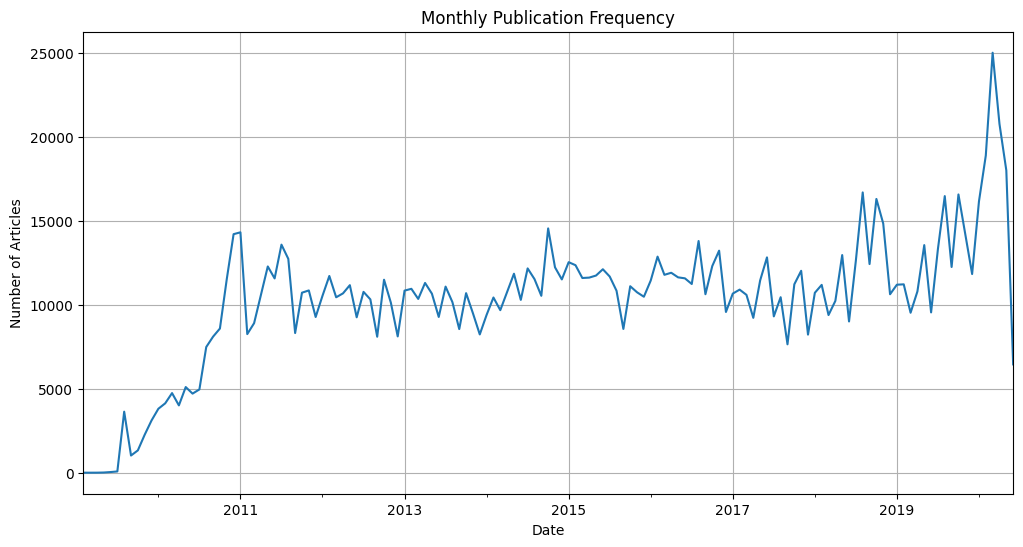

In [21]:
# Plot daily publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot weekly publication frequency
plt.figure(figsize=(12, 6))
weekly_counts.plot()
plt.title('Weekly Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot monthly publication frequency
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

### Identify Spikes Related to Market Events
To detect any spikes in publication frequency that might be associated with specific market events, I can annotate the plots with known financial events (like earnings reports, market crashes, etc.).

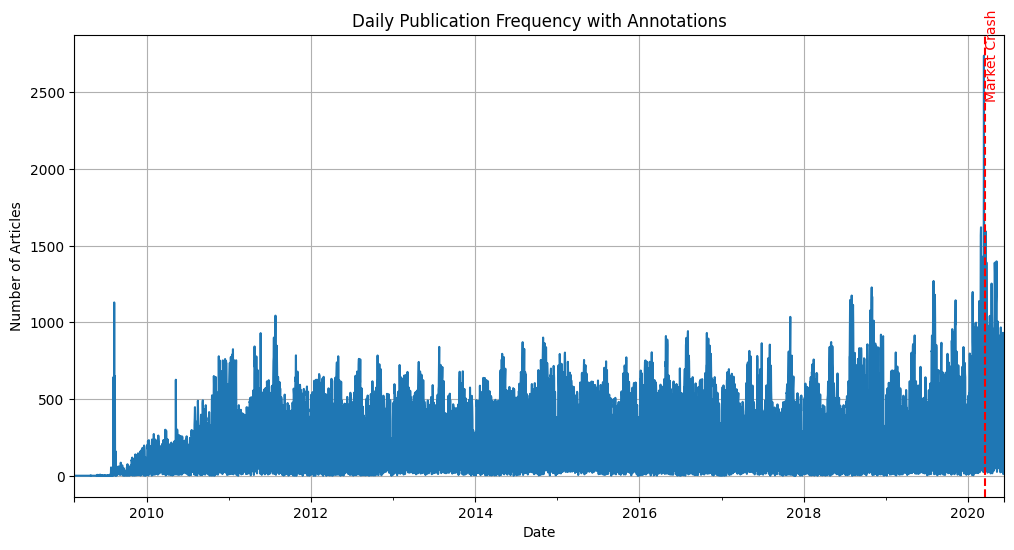

In [22]:
# Example of annotating a specific date
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Publication Frequency with Annotations')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Annotate a known market event
plt.axvline(x=pd.Timestamp('2020-03-16'), color='r', linestyle='--')  # Example date
plt.text(pd.Timestamp('2020-03-16'), max(daily_counts), 'Market Crash', rotation=90, verticalalignment='center', color='red')
plt.grid(True)
plt.show()

### Analyze Publishing Times
I can analyze the distribution of article publishing times throughout the day to see if there’s a specific time when most news is released.

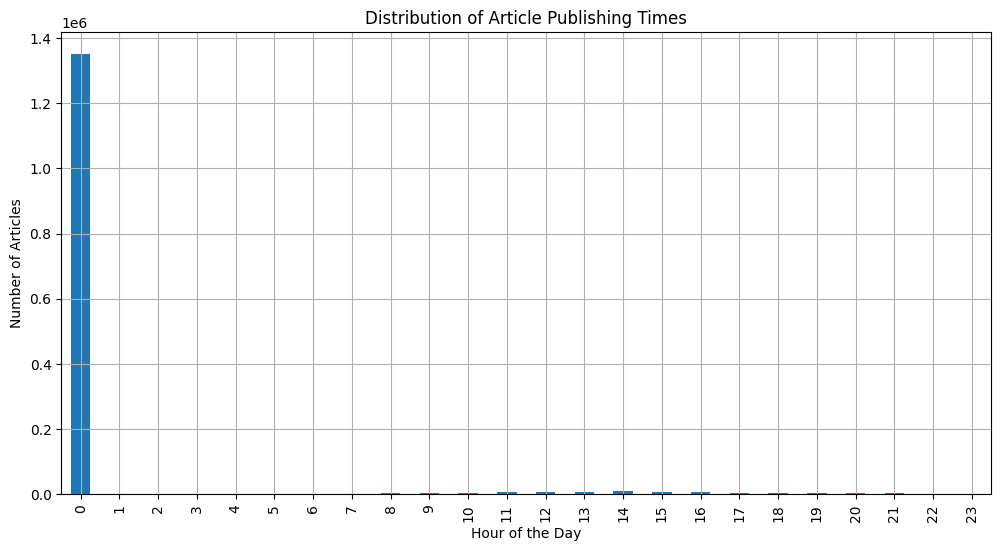

In [23]:
# Extract hour from the date
df['hour'] = df['date'].dt.hour

# Plot the distribution of publishing times
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Article Publishing Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Publisher Analysis

### Count the Number of Articles by Each Publisher
This will show which publishers contribute the most.

In [24]:
# Count the number of articles by each publisher
publisher_counts = df['publisher'].value_counts()

# Display the top 10 publishers
print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


### Analyze the Type of News by Publisher
I can use keywords or sentiment analysis to categorize the type of news each publisher reports. For now, I'll identify common themes or keywords in the headlines reported by each publisher.

In [25]:
# Group headlines by publisher and join them into a single text
publisher_headlines = df.groupby('publisher')['headline'].apply(lambda x: ' '.join(x))

# Display the headlines for the top publishers
print(publisher_headlines.head())

publisher
47ertrends          Saturday, February 18, 2012 Stock Market Trend...
AARP                3 Ways Small Businesses Can Get Emergency Help...
ABNNewswire         BPH Energy Limited (ASX:BPH): Swinburne Univer...
Aakin               Sony Ups The Ante With Its Latest dSLR Offerin...
Aaron Jackson.Ed    The Top Things I've Read This Week The Best Th...
Name: headline, dtype: object


### Identify Unique Email Domains
If publishers use email addresses as names, extracting domains will help identify contributing organizations.

In [26]:
# Extract domain names from publisher email addresses (if applicable)
df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')

# Count the number of articles by each domain
domain_counts = df['domain'].value_counts()

# Display the top 10 domains
print(domain_counts.head(10))

domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


### Analyze Contribution by Organization
If specific organizations dominate the news feed, understanding their contribution can provide insights into potential biases or focus areas.

In [27]:
# Analyze the contribution of the top domains
top_domains = domain_counts.head(10).index
top_domain_publishers = df[df['domain'].isin(top_domains)]

# Display some samples of headlines from these top domains
print(top_domain_publishers[['domain', 'headline']].head(20))

                                 domain  \
date                                      
2020-05-22 15:23:25+00:00  benzinga.com   
2020-05-22 13:36:20+00:00  benzinga.com   
2020-05-22 12:37:59+00:00  benzinga.com   
2020-05-22 00:00:00+00:00  benzinga.com   
2020-04-28 00:00:00+00:00  benzinga.com   
2020-03-11 00:00:00+00:00  benzinga.com   
2020-03-03 00:00:00+00:00  benzinga.com   
2018-05-14 00:00:00+00:00  benzinga.com   
2018-05-14 00:00:00+00:00  benzinga.com   
2017-11-14 00:00:00+00:00     gmail.com   
2020-05-26 11:47:48+00:00  benzinga.com   
2020-03-16 00:00:00+00:00  benzinga.com   
2020-03-11 00:00:00+00:00  benzinga.com   
2020-03-10 00:00:00+00:00  benzinga.com   
2020-03-09 00:00:00+00:00  benzinga.com   
2020-05-01 00:00:00+00:00  benzinga.com   
2020-03-12 00:00:00+00:00  benzinga.com   
2020-03-12 00:00:00+00:00  benzinga.com   
2020-03-10 00:00:00+00:00  benzinga.com   
2020-03-10 00:00:00+00:00  benzinga.com   

                                                     

# Quantitative analysis

In [28]:
file_paths = {
    "AAPL": "../data/yfinance_data/AAPL_historical_data.csv",
    "AMZN": "../data/yfinance_data/AMZN_historical_data.csv",
    "GOOG": "../data/yfinance_data/GOOG_historical_data.csv",
    "META": "../data/yfinance_data/META_historical_data.csv",
    "MSFT": "../data/yfinance_data/MSFT_historical_data.csv",
    "NVDA": "../data/yfinance_data/NVDA_historical_data.csv",
    "TSLA": "../data/yfinance_data/TSLA_historical_data.csv"
}

I started by loading historical stock price data for multiple companies into pandas DataFrames. Each DataFrame includes columns such as 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.

In [29]:
dataframes = {}
for name, path in file_paths.items():
    dataframes[name] = pd.read_csv(path)

for name, df in dataframes.items():
    print(f"Dataframe {name.upper()}:")
    print(df.head())
    print()

Dataframe AAPL:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

Dataframe AMZN:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000  

#### Convert the date column to datetime, then set the date column as index 

In [30]:
for name, df in dataframes.items():
    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Update the dataframe in the dictionary
    dataframes[name] = df
    print(df.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1997-05-15  0.121875  0.125000  0.096354  0.097

### Technical Indicators: I applied several technical indicators using the TA-Lib library:

 - **Simple Moving Average (SMA)**: Helps smooth out price data to identify trends.
 - **Exponential Moving Average (EMA)**: Provides more weight to recent prices, making it more responsive to new information.
 - **Relative Strength Index (RSI)**: Measures the speed and change of price movements to identify overbought or oversold conditions.
 - **Moving Average Convergence Divergence (MACD)**: Indicates changes in the strength, direction, momentum, and duration of a trend.

In [35]:
def apply_ta_indicators(df):
    # Simple Moving Average (SMA) using 'Adj Close'
    df['SMA'] = talib.SMA(df['Adj Close'], timeperiod=30)
    
    # Exponential Moving Average (EMA) using 'Adj Close'
    df['EMA'] = talib.EMA(df['Adj Close'], timeperiod=30)
    
    # Relative Strength Index (RSI) using 'Adj Close'
    df['RSI'] = talib.RSI(df['Adj Close'], timeperiod=14)
    
    # Moving Average Convergence Divergence (MACD) using 'Adj Close'
    df['MACD'], df['MACD_signal'], _ = talib.MACD(df['Adj Close'])
    
    return df

# Apply the TA indicators to each DataFrame
for name, df in dataframes.items():
    dataframes[name] = apply_ta_indicators(df)
    print(df.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  SMA  EMA  RSI  MACD  MACD_signal  
Date                                                                   
1980-12-12        0.0           0.0  NaN  NaN  NaN   NaN          NaN  
1980-12-15        0.0           0.0  NaN  NaN  NaN   NaN          NaN  
1980-12-16        0.0           0.0  NaN  NaN  NaN   NaN          NaN  
1980-12-17        0.0           0.0  NaN  NaN  NaN   NaN          NaN  
1980-12-18        0.0           0.0

### Portfolio Optimization: Using PyNance, I optimized stock portfolios to achieve:

 - **Maximum Sharpe Ratio**: The portfolio with the best risk-adjusted return.
 - **Minimum Variance**: The portfolio with the least risk.

In [32]:
# List of tickers for portfolio optimization
ticker_list = list(dataframes.keys())

# Create PortfolioCalculations object
portfolio = po.PortfolioCalculations(ticker_list)

# Calculate the maximum Sharpe ratio portfolio
max_sharpe = portfolio.max_sharpe_portfolio('rr')
print("\nMaximum Sharpe Ratio Portfolio:")
print(max_sharpe)

# Get portfolio weights for maximum Sharpe ratio
max_sharpe_df = portfolio.max_sharpe_portfolio('df')
print("\nMaximum Sharpe Ratio Portfolio Weights:")
print(max_sharpe_df.head())

# Calculate the minimum variance portfolio
min_var = portfolio.min_var_portfolio('rr')
print("\nMinimum Variance Portfolio:")
print(min_var)

# Get portfolio weights for minimum variance
min_var_df = portfolio.min_var_portfolio('df')
print("\nMinimum Variance Portfolio Weights:")
print(min_var_df.head())

c:\Users\hp\Documents\Internship\Kifiya\AIM2\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\hp\Documents\Internship\Kifiya\AIM2\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\hp\Documents\Internship\Kifiya\AIM2\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 


Maximum Sharpe Ratio Portfolio:
                   Max Sharpe Portfolio
Expected Return                 103.67%
Standard Deviation               43.97%

Maximum Sharpe Ratio Portfolio Weights:
     Portfolio Weight
AAPL           16.46%
AMZN            0.00%
GOOG            0.00%
META            0.00%
MSFT            0.00%

Minimum Variance Portfolio:
                   Min Var Portfolio
Expected Return               29.18%
Standard Deviation            21.84%

Minimum Variance Portfolio Weights:
     Portfolio Weight
AAPL            6.81%
AMZN            0.00%
GOOG           20.98%
META            0.00%
MSFT           72.21%


## Visualize

In [33]:
def plot_stock_data(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Adj Close'], label='Adj Close Price')
    plt.plot(df.index, df['SMA'], label='30-Day SMA')
    plt.plot(df.index, df['EMA'], label='30-Day EMA')
    plt.title(f'{title} Adjusted Close Price and Indicators')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['RSI'], label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{title} RSI')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['MACD'], label='MACD')
    plt.plot(df.index, df['MACD_signal'], label='MACD Signal')
    plt.title(f'{title} MACD')
    plt.legend()
    plt.show()

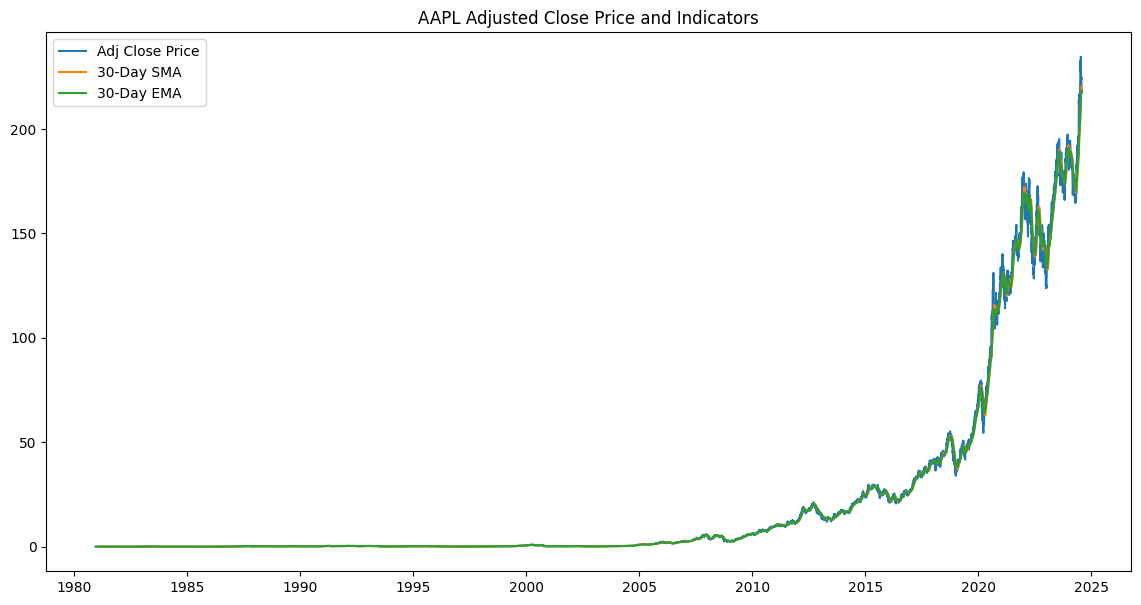

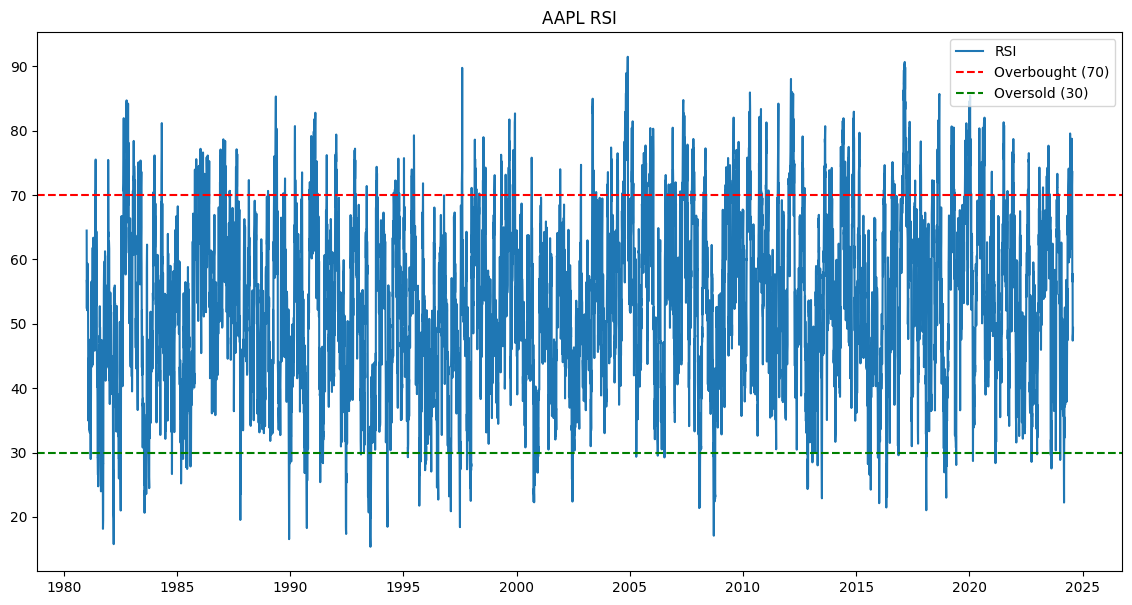

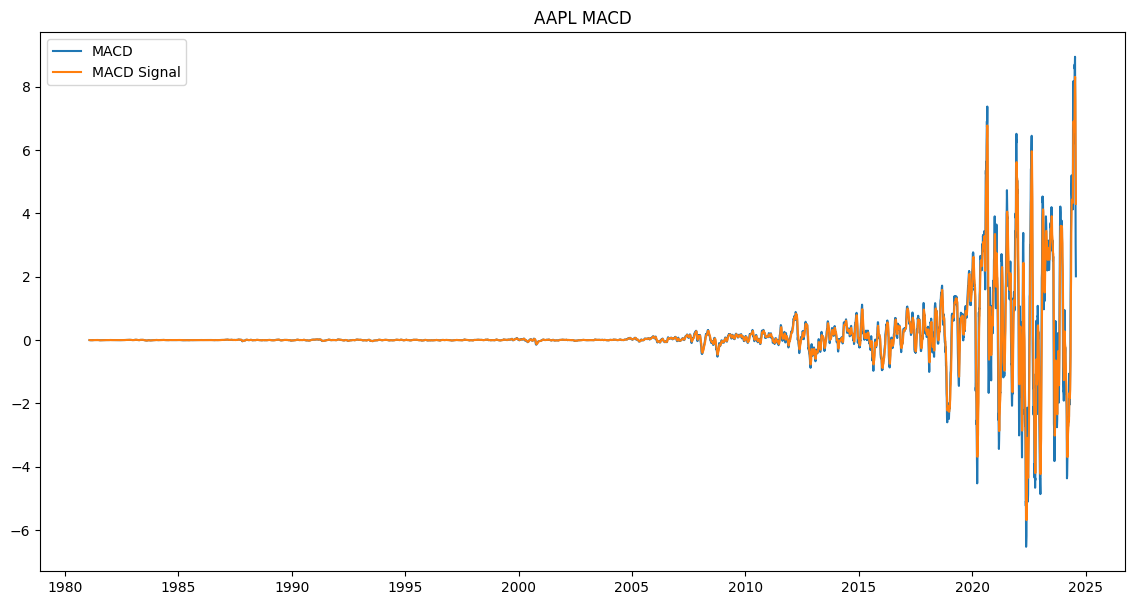

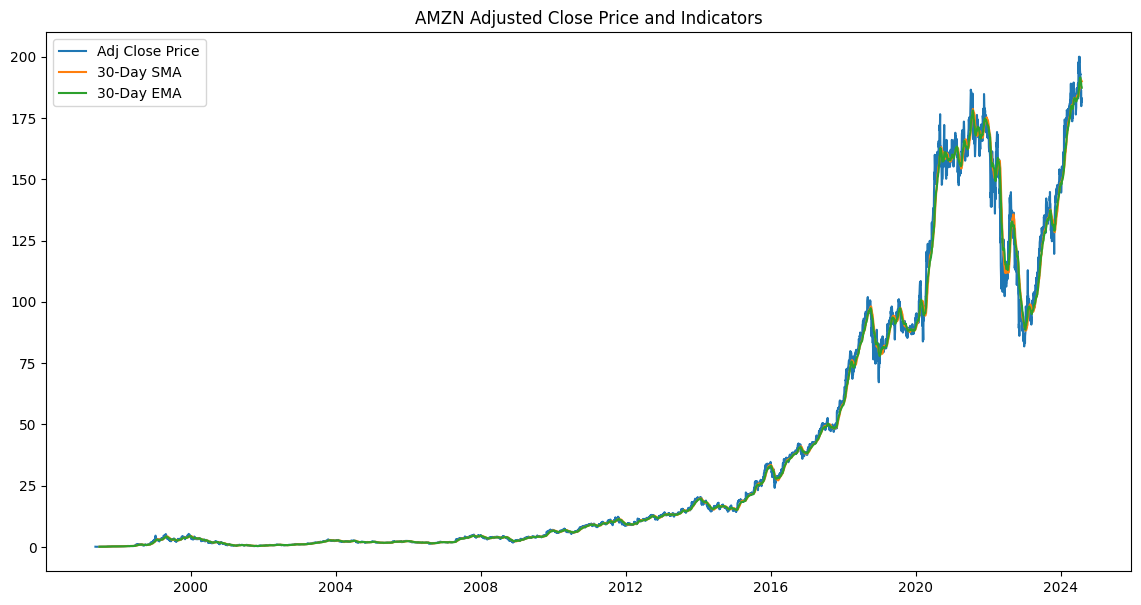

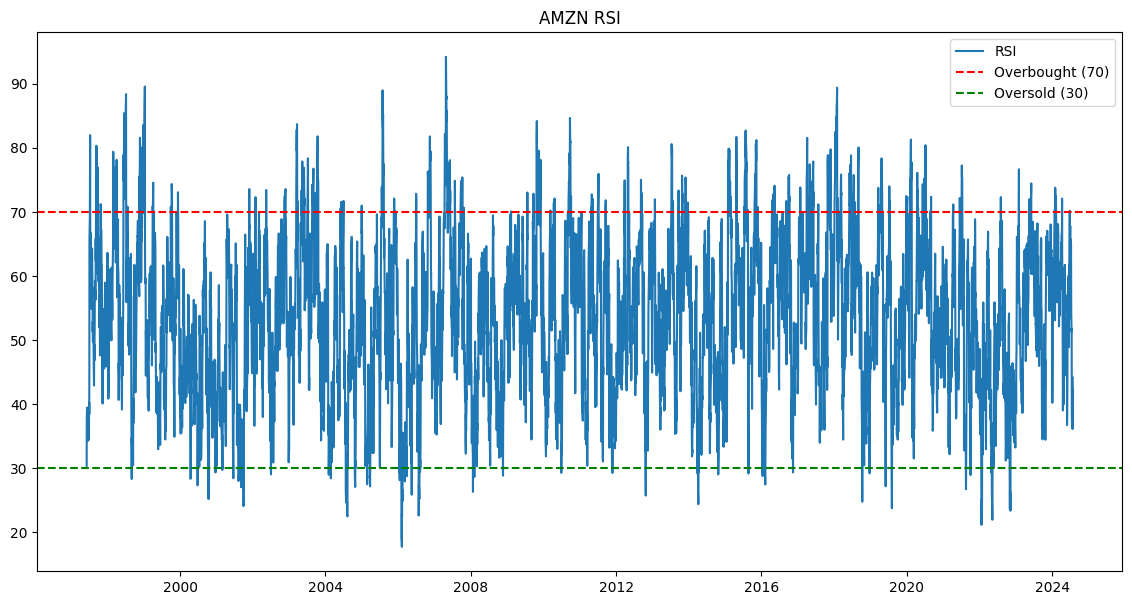

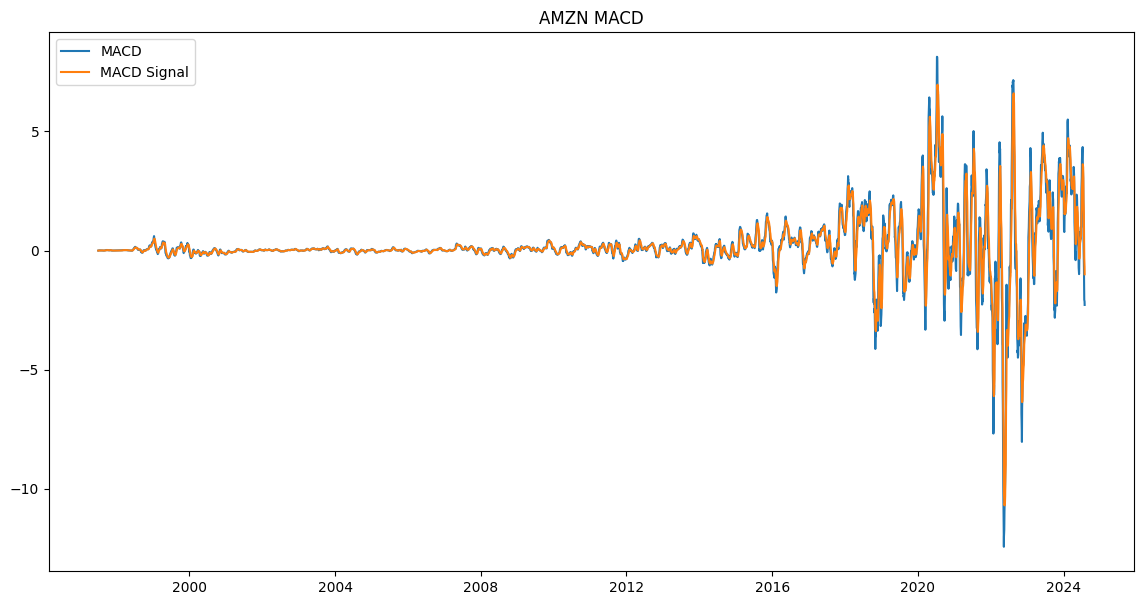

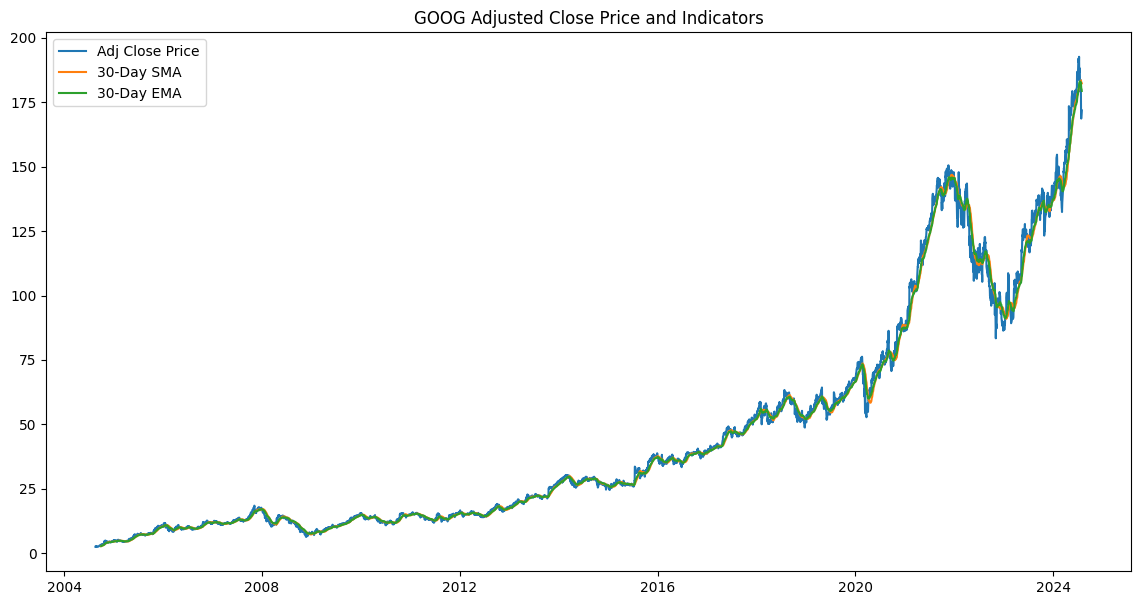

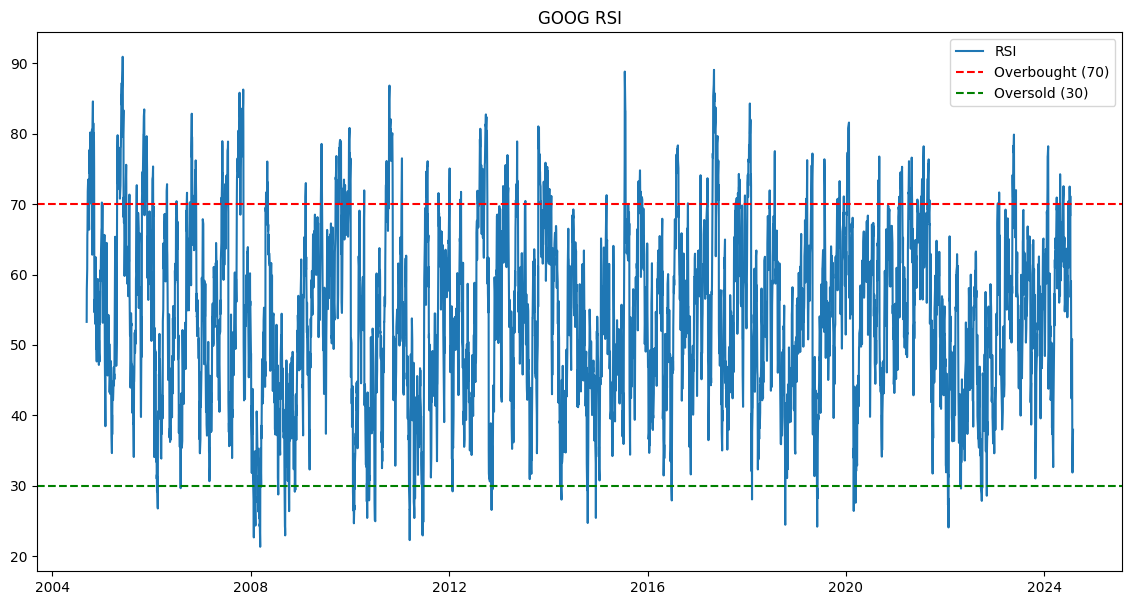

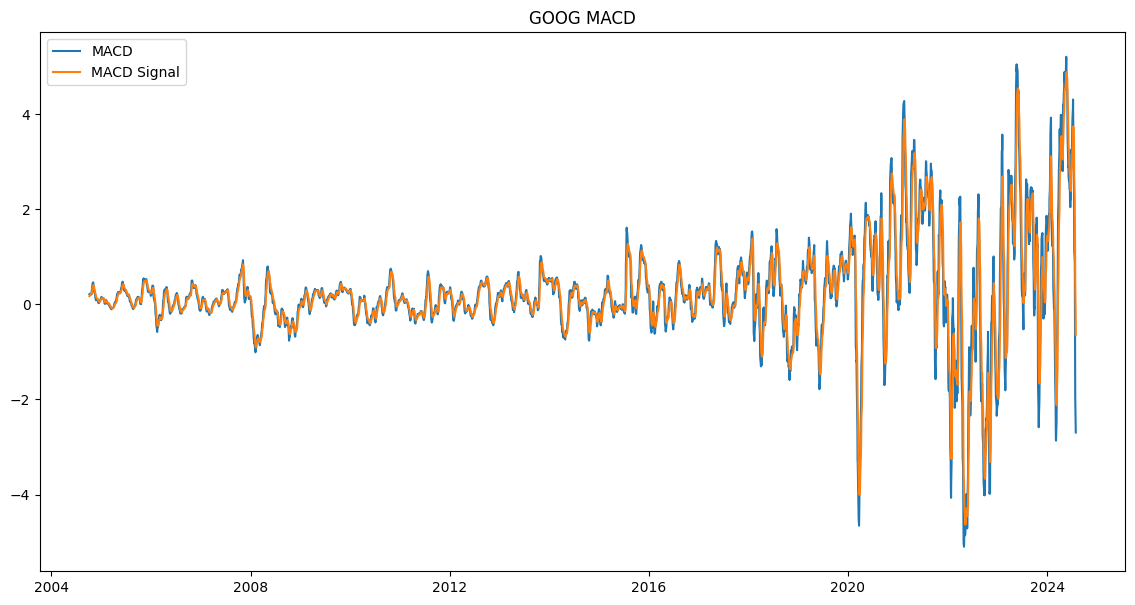

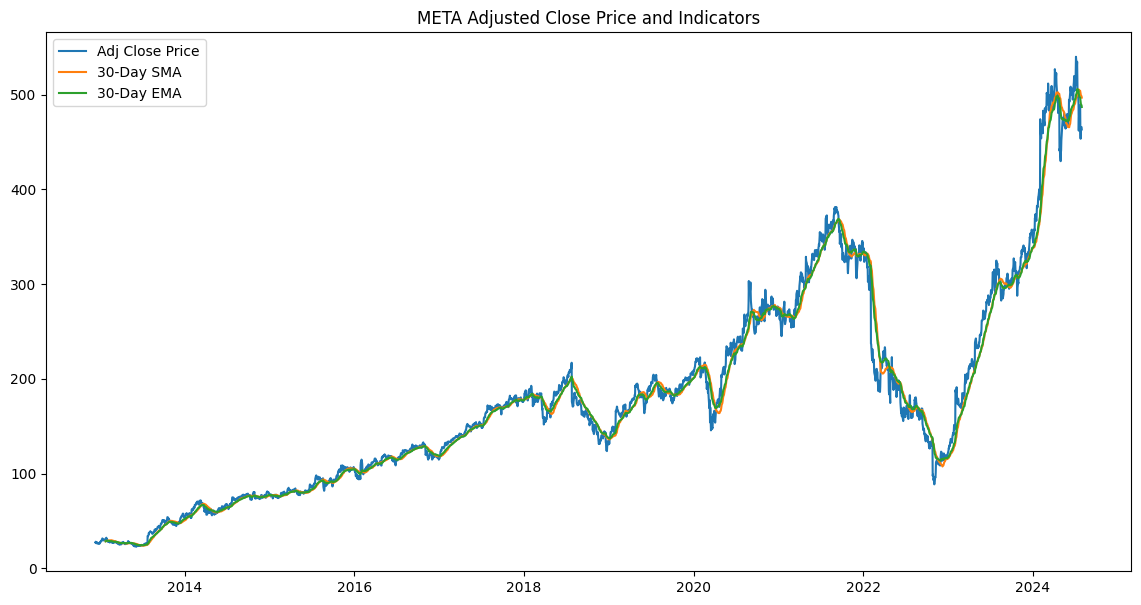

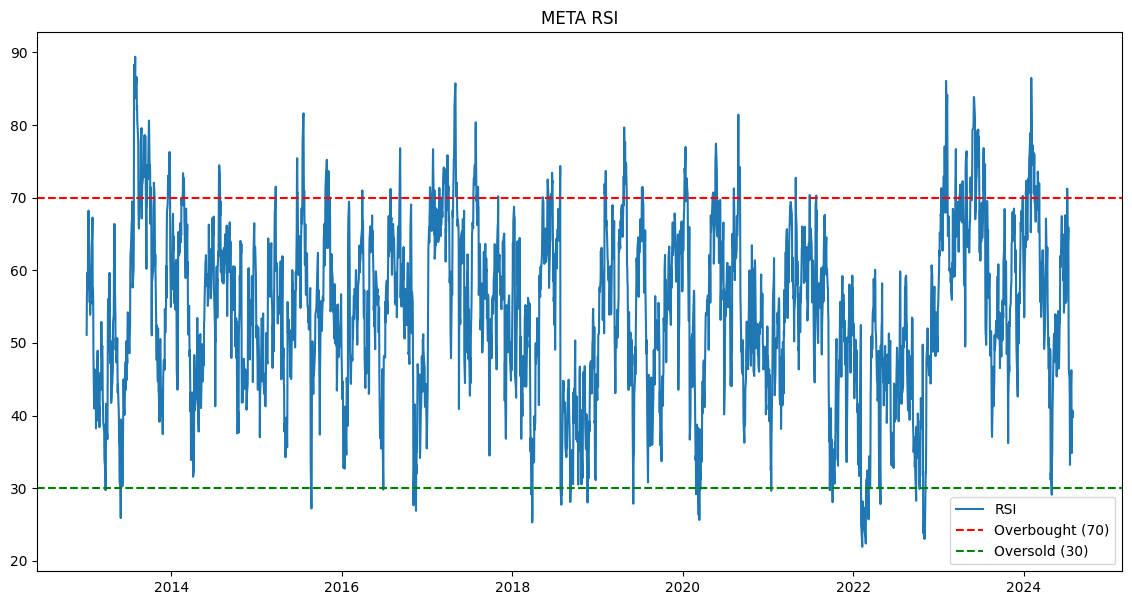

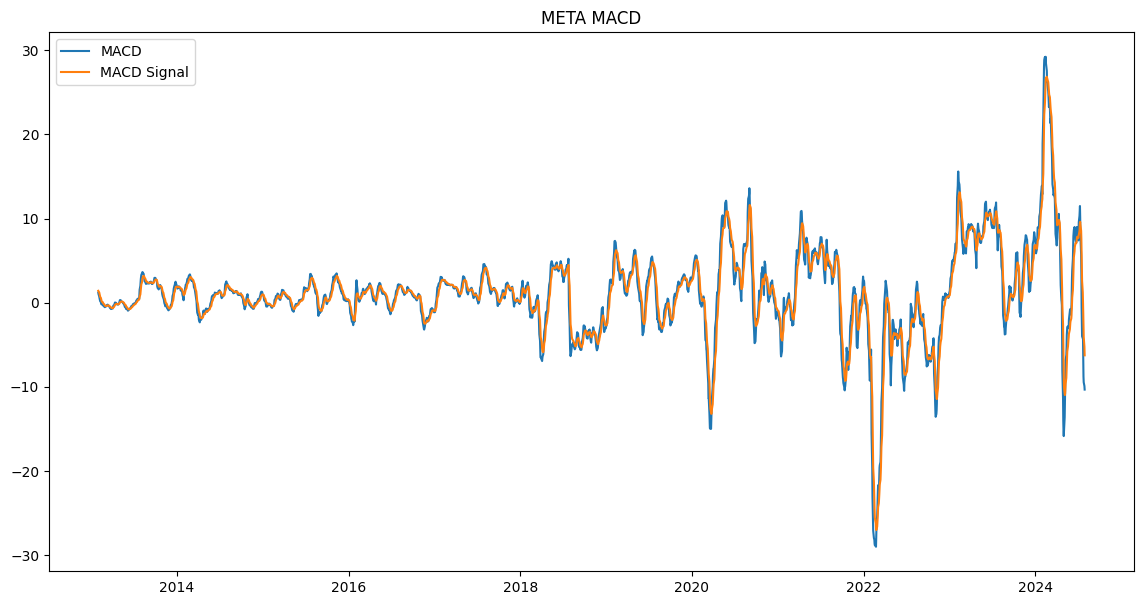

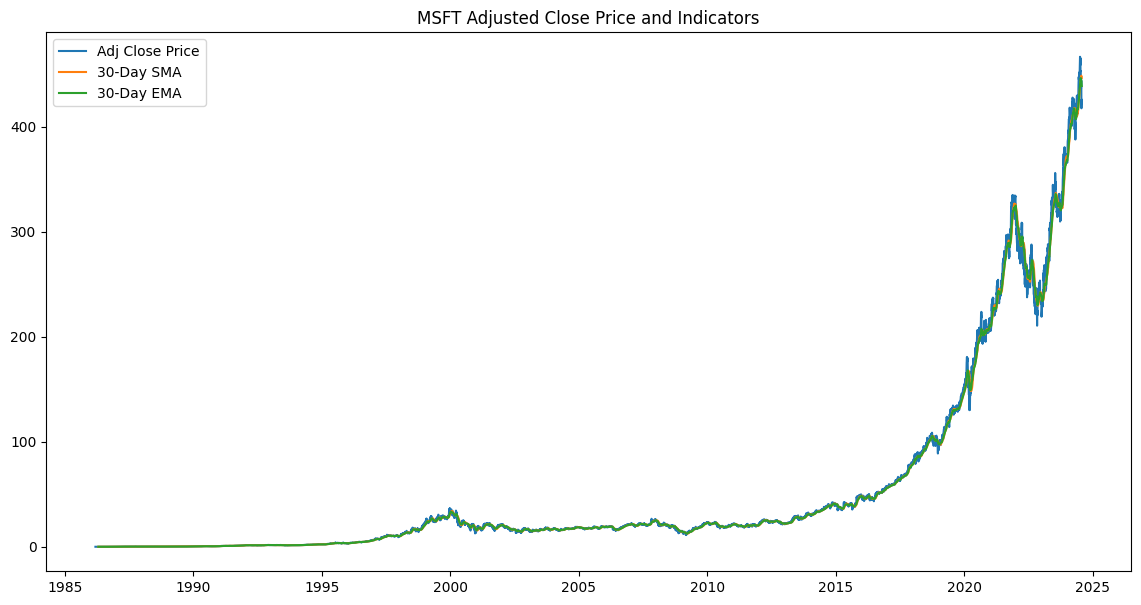

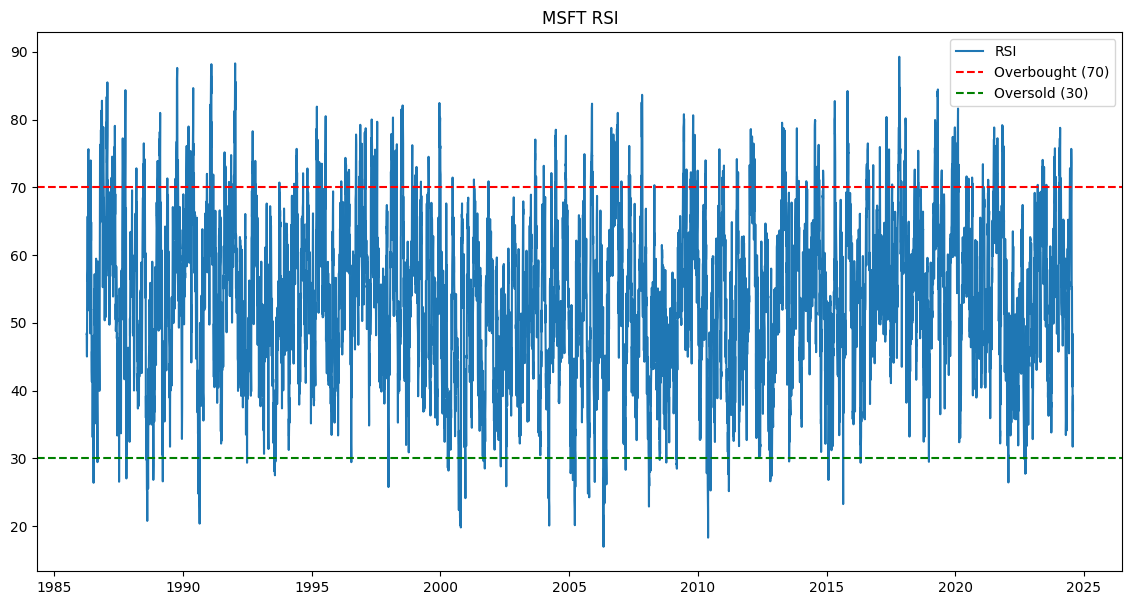

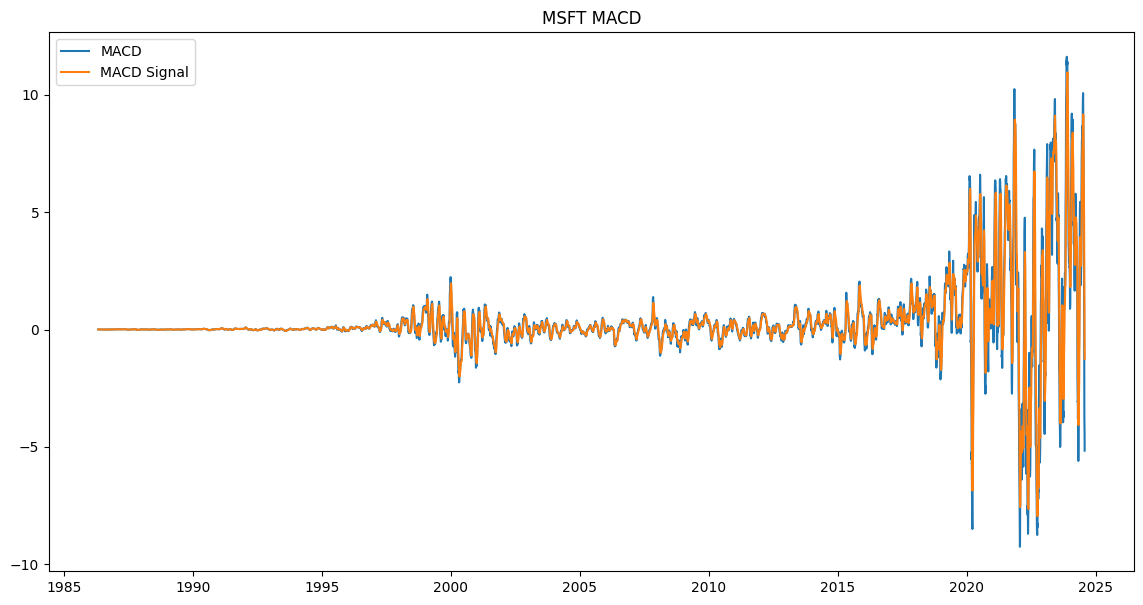

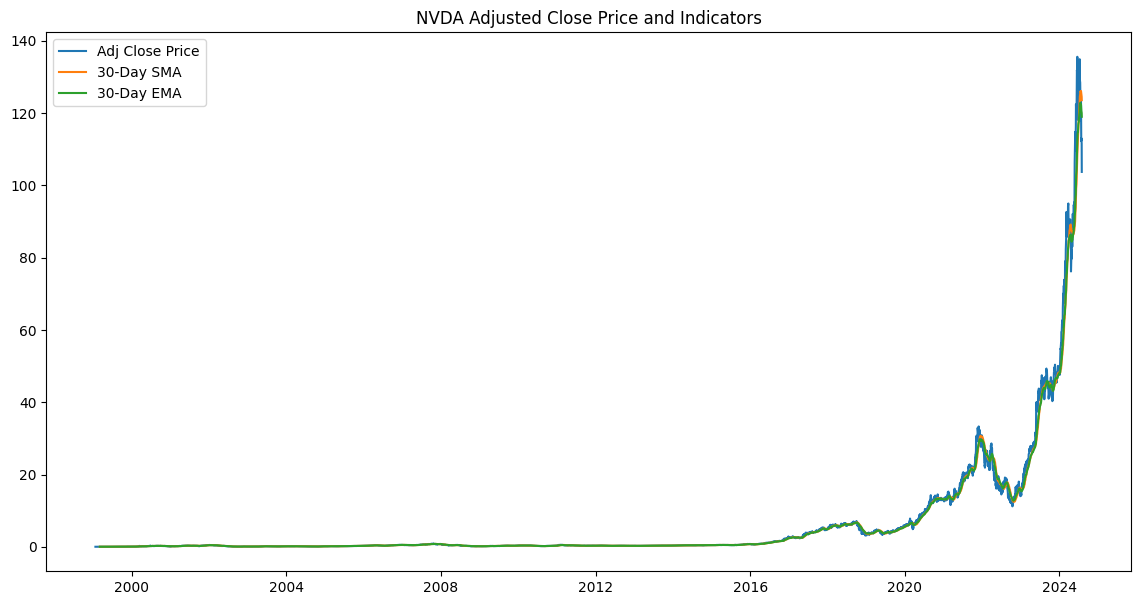

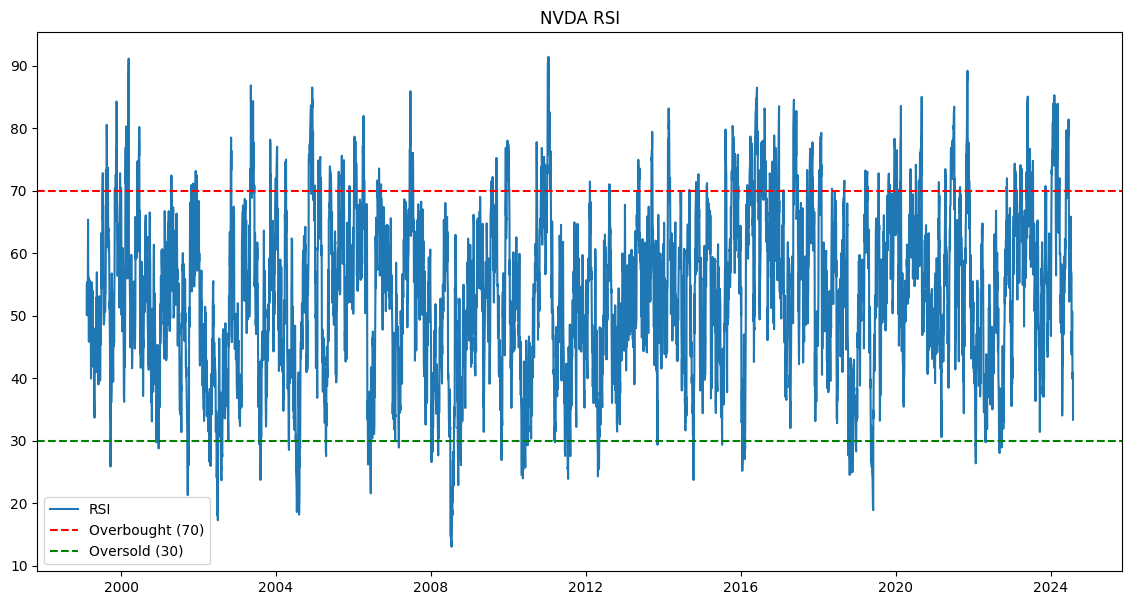

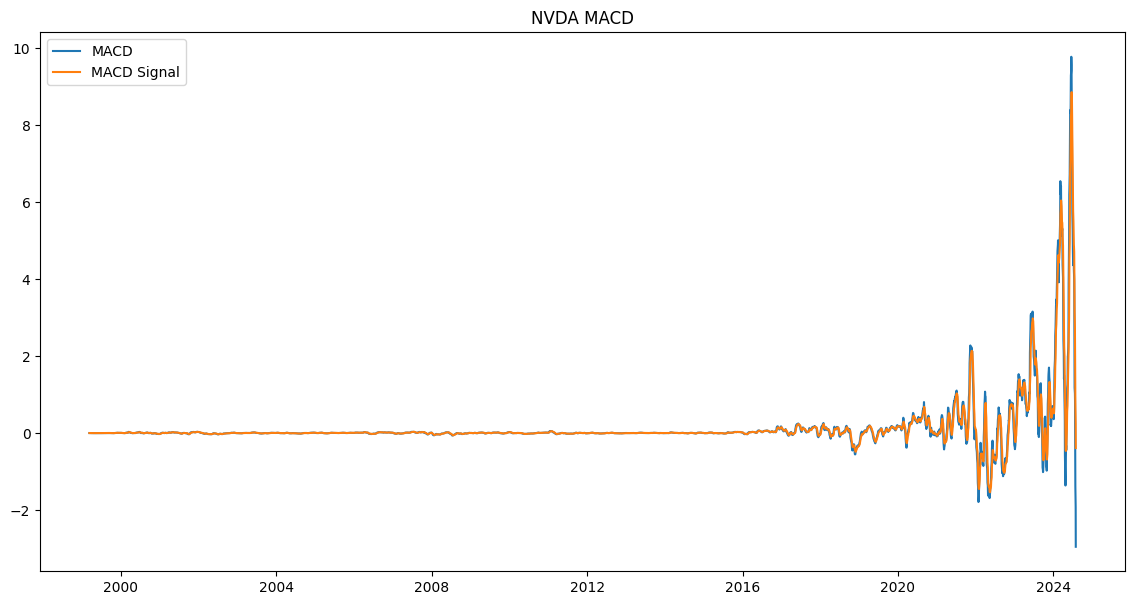

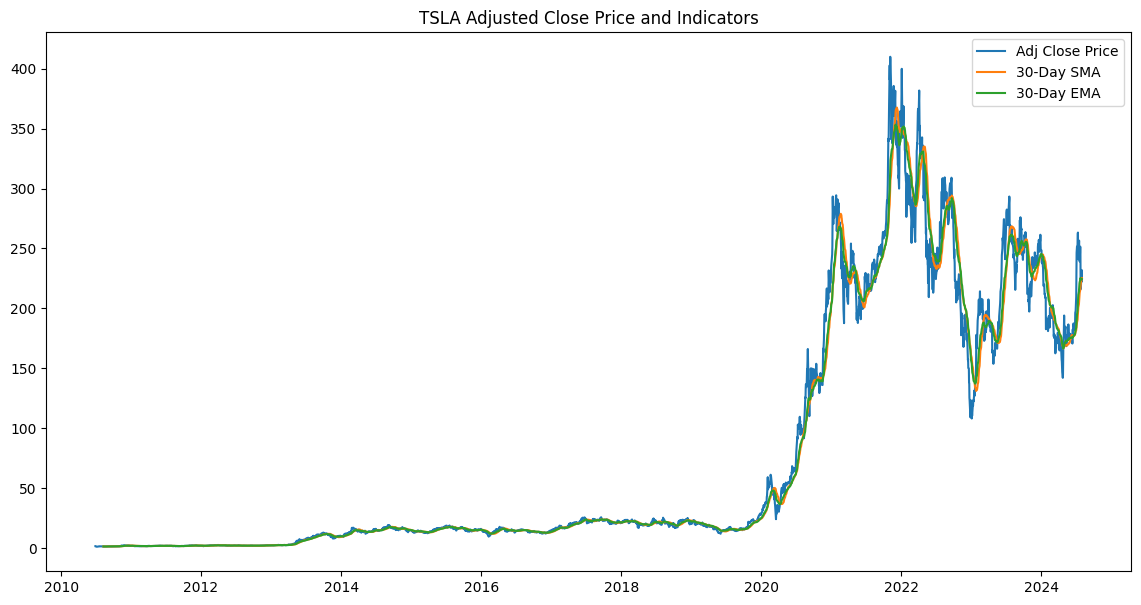

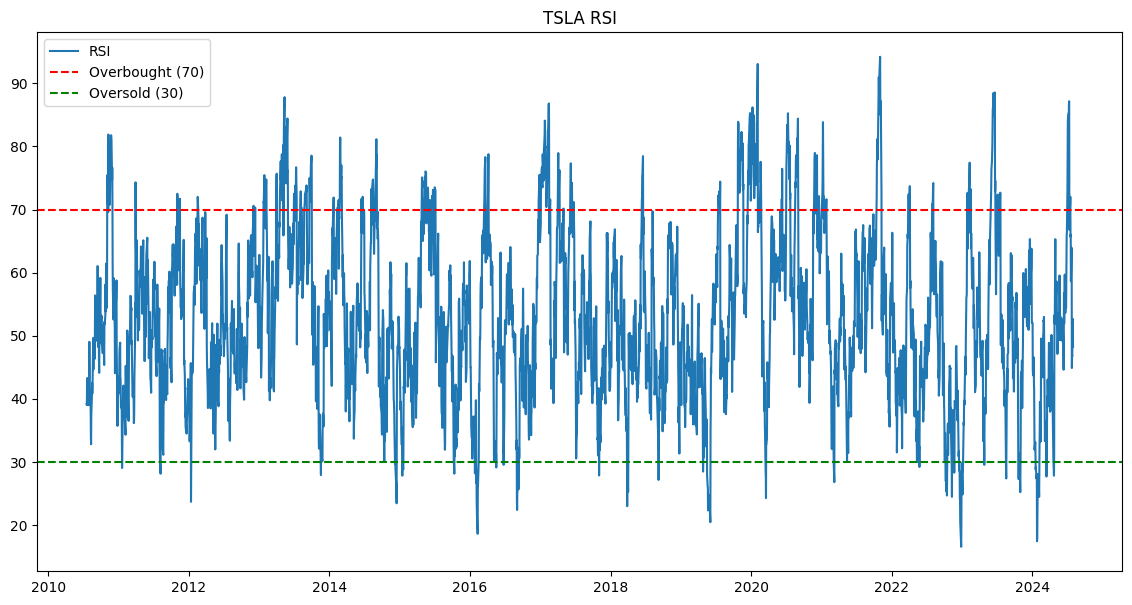

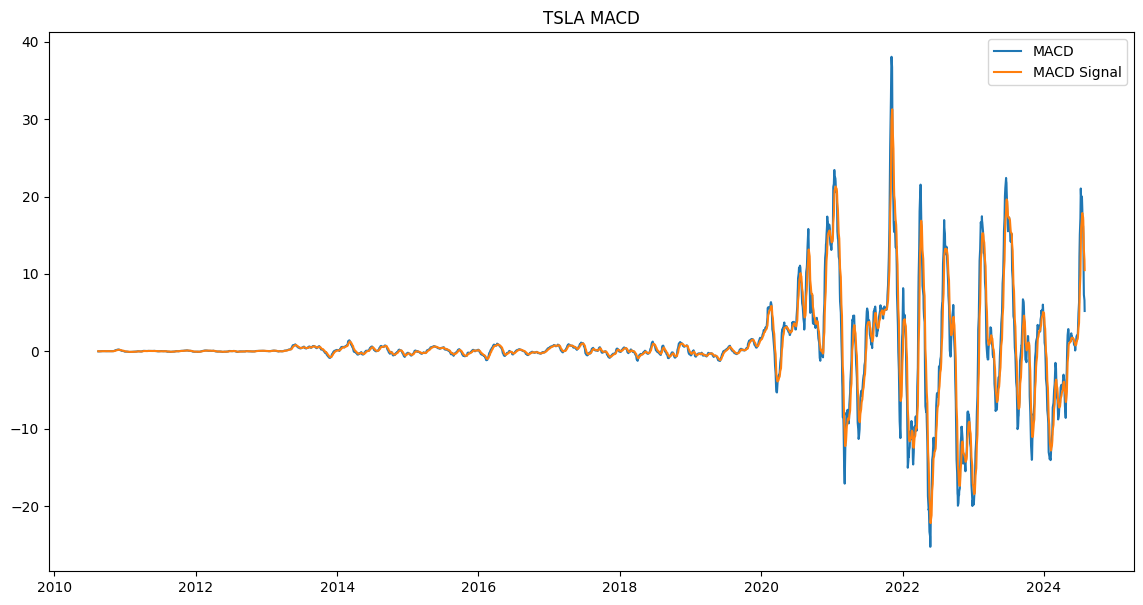

In [36]:
# Plot the data for each stock
for name, df in dataframes.items():
    plot_stock_data(df, name)